In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/ComputerVision

/content/drive/MyDrive/ComputerVision


In [ ]:
ls

curdata.csv  dataset/


In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd

data=[]
basepath='/content/drive/MyDrive/ComputerVision/dataset'
for folder in os.scandir(basepath):
    if folder.is_dir():
        #print(folder.name)
        for file in os.scandir(folder.path):
            im=np.array(Image.open(file.path))
            features=np.mean(im, axis=(0, 1)).tolist()
            features.append(folder.name)
            data.append(features)
            print(features)
df = pd.DataFrame(data, columns=['R','G','B','class'])
df.to_csv('curdata.csv',index=False)

[240.67860972222223, 220.36688541666666, 163.53539791666665, 'lemon']
[249.66221666666667, 219.0848138888889, 163.40175555555555, 'lemon']
[230.43756954379273, 228.02624781433795, 165.2374423780003, 'lemon']
[239.01060833333332, 221.4961722222222, 166.01647777777777, 'lemon']
[227.15680079483357, 211.09931445603576, 143.47723795330353, 'lemon']
[239.03539722222223, 221.49411944444444, 166.02510555555557, 'lemon']
[248.17161814220637, 227.86779560308972, 156.13703703703703, 'lemon']
[238.33206913580247, 229.35723456790123, 183.00574814814814, 'lemon']
[233.148304, 226.419736, 175.463576, 'lemon']
[249.34074722222223, 219.08745555555555, 163.4146027777778, 'lemon']
[239.69084947839048, 220.85857923497267, 159.57828117237952, 'lemon']
[247.7038777777778, 240.56735555555557, 200.97975555555556, 'lemon']
[238.90226907271753, 231.6488793599746, 171.97953268616124, 'lemon']
[242.30119402985073, 217.1075024875622, 148.8755223880597, 'lemon']
[251.5785775047259, 233.00014650283555, 168.17045841

In [ ]:
df = pd.read_csv('curdata.csv')

print(df)

lX = df[df['class']=='lemon']
mX = df[df['class']=='melon']

             R           G           B  class
0   249.662217  219.084814  163.401756  lemon
1   247.782056  240.563411  201.007356  lemon
2   243.808022  229.534043  197.480453  lemon
3   233.148304  226.419736  175.463576  lemon
4   239.035397  221.494119  166.025106  lemon
5   240.678610  220.366885  163.535398  lemon
6   239.010608  221.496172  166.016478  lemon
7   251.578578  233.000147  168.170458  lemon
8   247.703878  240.567356  200.979756  lemon
9   249.340747  219.087456  163.414603  lemon
10  238.902269  231.648879  171.979533  lemon
11  239.690849  220.858579  159.578281  lemon
12  110.106587  135.742176   44.469429  lemon
13  238.332069  229.357235  183.005748  lemon
14  240.578963  220.283970  163.491477  lemon
15  245.905521  231.562980  192.325417  lemon
16  232.690826  232.248174  170.528451  lemon
17  227.156801  211.099314  143.477238  lemon
18  248.171618  227.867796  156.137037  lemon
19  242.301194  217.107502  148.875522  lemon
20  230.437570  228.026248  165.23

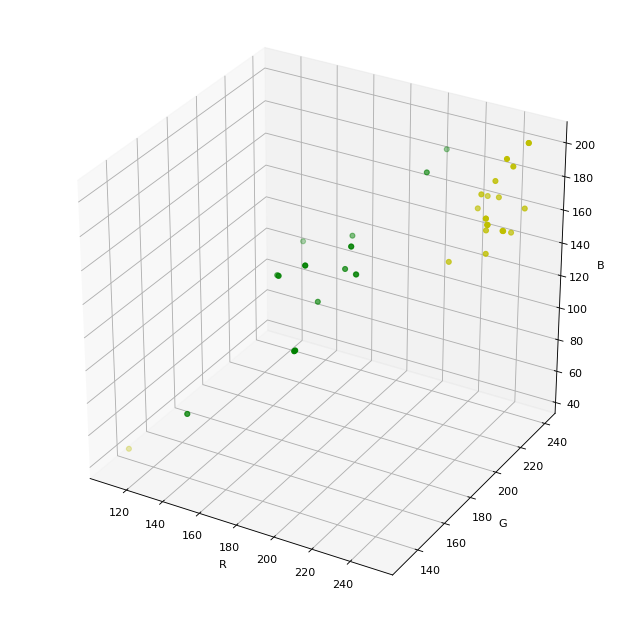

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B');

ax.scatter3D(lX['R'], lX['G'], lX['B'],color='y')
ax.scatter3D(mX['R'], mX['G'], mX['B'],color='g')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

le = preprocessing.LabelEncoder()
y=le.fit(y).transform(y)

print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


[[240.67860972 220.36688542 163.53539792]
 [249.66221667 219.08481389 163.40175556]
 [230.43756954 228.02624781 165.23744238]
 [239.01060833 221.49617222 166.01647778]
 [227.15680079 211.09931446 143.47723795]
 [239.03539722 221.49411944 166.02510556]
 [248.17161814 227.8677956  156.13703704]
 [238.33206914 229.35723457 183.00574815]
 [233.148304   226.419736   175.463576  ]
 [249.34074722 219.08745556 163.41460278]
 [239.69084948 220.85857923 159.57828117]
 [247.70387778 240.56735556 200.97975556]
 [238.90226907 231.64887936 171.97953269]
 [242.30119403 217.10750249 148.87552239]
 [251.5785775  233.0001465  168.17045841]
 [232.69082632 232.24817417 170.52845126]
 [240.57896296 220.28397037 163.49147654]
 [110.10658718 135.74217586  44.46942871]
 [243.80802228 229.53404324 197.48045324]
 [245.90552084 231.56297951 192.32541723]
 [240.67869722 220.37290139 163.52430903]
 [247.78205556 240.56341111 201.00735556]
 [201.34313243 178.40347689 150.45888548]
 [165.80515433 171.06257163 143.58

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[7 1]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.86      1.00      0.92         6

    accuracy                           0.93        14
   macro avg       0.93      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14



https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://anaconda.org/DistrictDataLabs/yellowbrick

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image=input("Enter image path : ")
im=np.array(Image.open(image))
features=np.mean(im, axis=(0, 1)).tolist()
yp=svclassifier.predict([features])
yp=le.inverse_transform(yp)
print('It is a '+yp[0])
plt.axis("off")
plt.imshow(im)
plt.show()